In [1]:
#!pip install yfinance

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=yf.download('Reliance.NS',start='2015-01-01',end='2022-12-30')
data

[*********************100%***********************]  1 of 1 completed


Open         High          Low        Close    Adj Close  \
Date                                                                          
2015-01-01   438.988831   441.812073   437.676270   439.781311   417.988922   
2015-01-02   439.880371   443.818054   437.998199   438.617340   416.882599   
2015-01-05   438.344940   441.267212   432.946106   433.812897   412.316254   
2015-01-06   430.915344   432.401276   412.093750   414.124512   393.603516   
2015-01-07   414.619812   425.367950   414.570282   423.139069   402.171295   
...                 ...          ...          ...          ...          ...   
2022-12-23  2563.300049  2590.500000  2492.250000  2502.199951  2502.199951   
2022-12-26  2514.750000  2542.000000  2492.399902  2524.050049  2524.050049   
2022-12-27  2530.000000  2548.800049  2515.250000  2544.699951  2544.699951   
2022-12-28  2538.000000  2549.800049  2521.500000  2544.449951  2544.449951   
2022-12-29  2527.000000  2548.899902  2525.500000  2543.300049  2543.300049   

             Volume  
Date                 
2015-01-01  1367720  
2015-01-02  3383424  
2015-01-05  4662967  
2015-01-06  8596809  
2015-01-07  9562421  
...             ...  
2022-12-23  4733657  
2022-12-26  2764496  
2022-12-27  2659749  
2022-12-28  3442509  
2022-12-29  3198493  

[1975 rows x 6 columns]

In [4]:
data.duplicated()

Date
2015-01-01    False
2015-01-02    False
2015-01-05    False
2015-01-06    False
2015-01-07    False
              ...  
2022-12-23    False
2022-12-26    False
2022-12-27    False
2022-12-28    False
2022-12-29    False
Length: 1975, dtype: bool

In [6]:
data.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [7]:
data.shape

(1975, 6)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1975 entries, 2015-01-01 to 2022-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1975 non-null   float64
 1   High       1975 non-null   float64
 2   Low        1975 non-null   float64
 3   Close      1975 non-null   float64
 4   Adj Close  1975 non-null   float64
 5   Volume     1975 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 108.0 KB


In [9]:
data.describe()

Open         High          Low        Close    Adj Close  \
count  1975.000000  1975.000000  1975.000000  1975.000000  1975.000000   
mean   1315.179125  1330.164275  1299.554631  1314.265526  1299.817381   
std     751.883488   760.172230   743.035442   751.276003   755.452887   
min     404.466064   405.010895   394.485657   401.568542   381.669678   
25%     530.112579   537.319244   525.939636   531.833740   515.988281   
50%    1168.919800  1186.998413  1151.385986  1169.811401  1155.051270   
75%    2040.775024  2065.175049  2003.125000  2033.549988  2020.944702   
max    2856.149902  2856.149902  2786.100098  2819.850098  2811.385742   

             Volume  
count  1.975000e+03  
mean   9.091729e+06  
std    6.693890e+06  
min    7.871600e+05  
25%    5.242932e+06  
50%    7.151632e+06  
75%    1.025320e+07  
max    6.584835e+07

In [3]:
print(len(data))

1975


<AxesSubplot:xlabel='Date'>

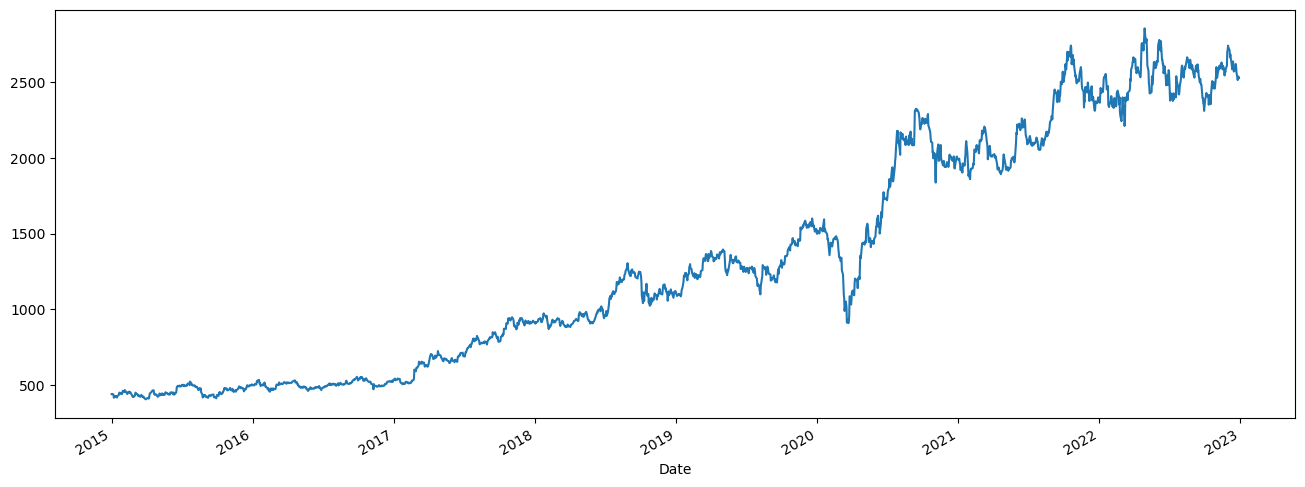

In [4]:
data['Open'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

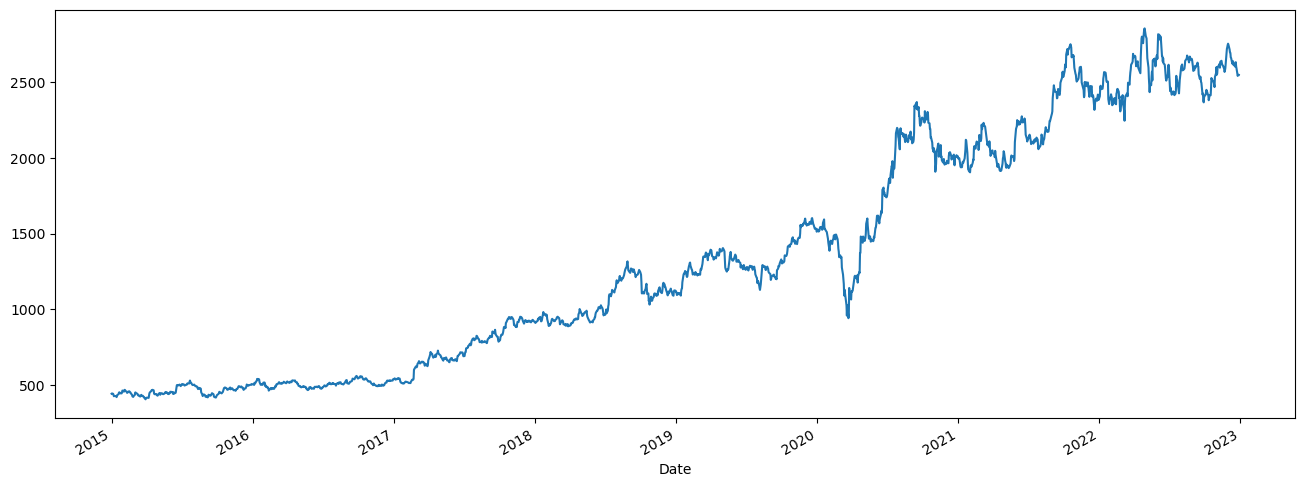

In [5]:
data['High'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

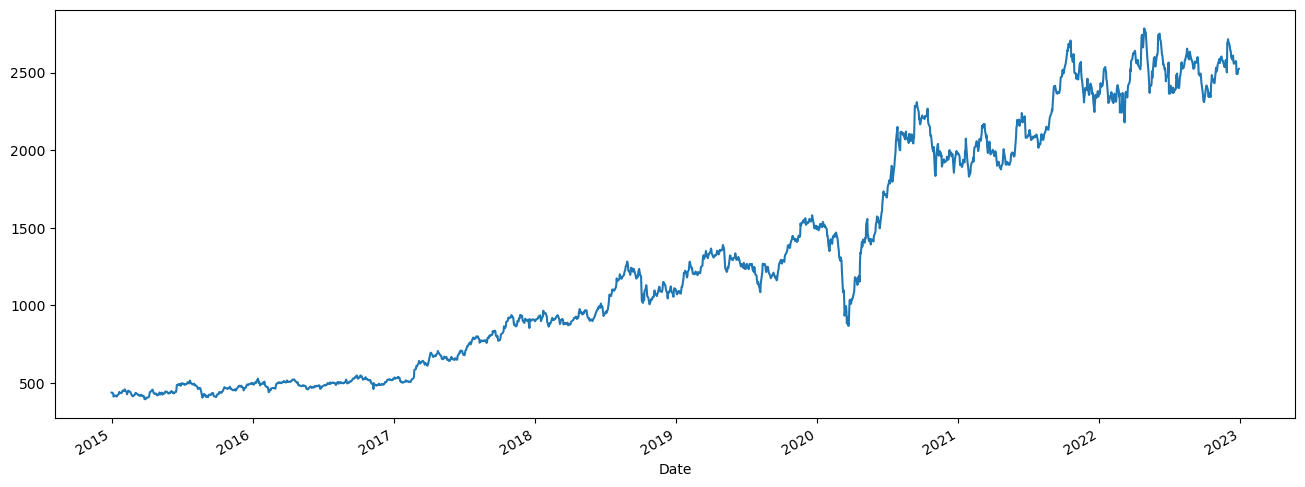

In [6]:
data['Low'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

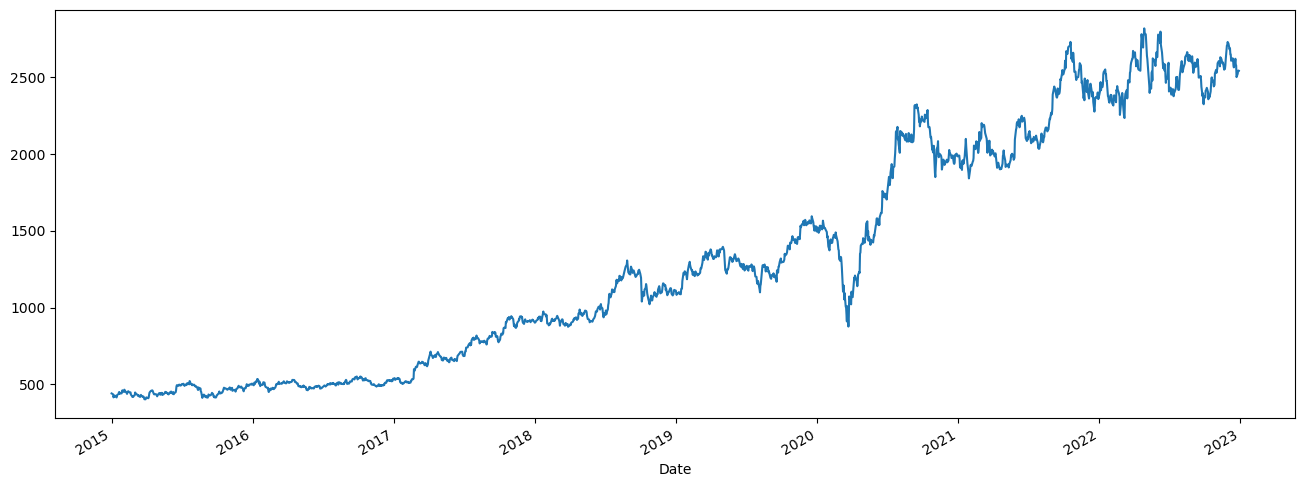

In [7]:
data['Close'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

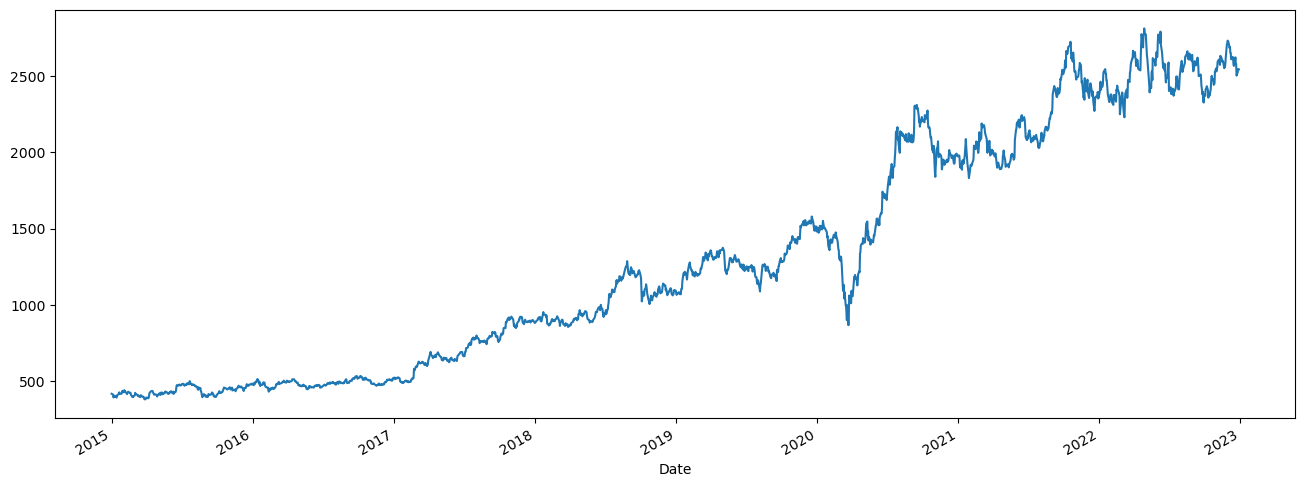

In [8]:
data['Adj Close'].plot(figsize=(16,6))

<AxesSubplot:xlabel='Date'>

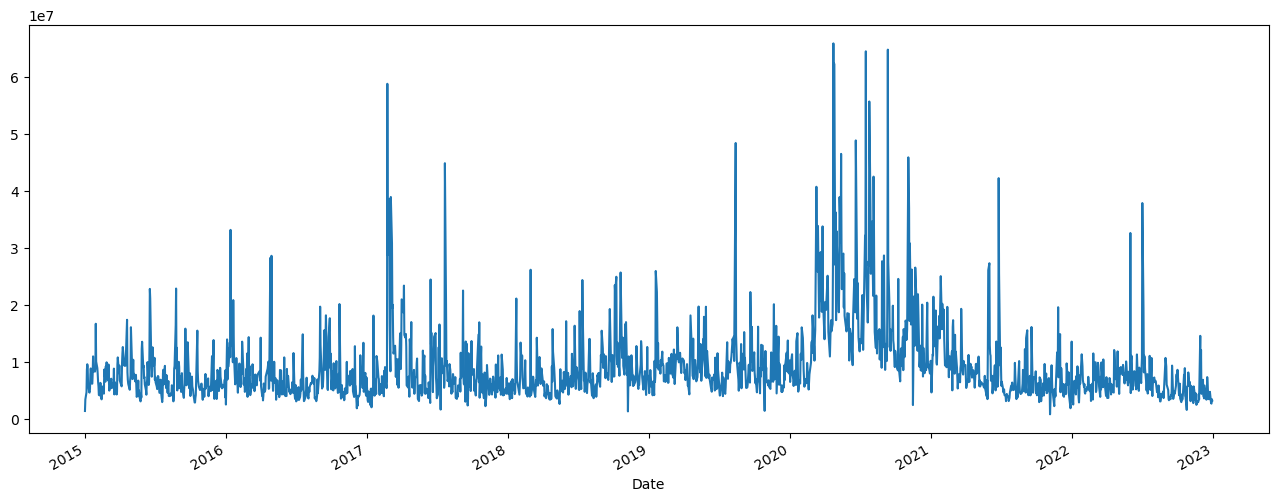

In [9]:
data['Volume'].plot(figsize=(16,6))

## Correlation

In [10]:
data.corr()

Open      High       Low     Close  Adj Close    Volume
Open       1.000000  0.999740  0.999739  0.999459   0.999452  0.073167
High       0.999740  1.000000  0.999679  0.999799   0.999788  0.082296
Low        0.999739  0.999679  1.000000  0.999773   0.999768  0.066584
Close      0.999459  0.999799  0.999773  1.000000   0.999990  0.075249
Adj Close  0.999452  0.999788  0.999768  0.999990   1.000000  0.074584
Volume     0.073167  0.082296  0.066584  0.075249   0.074584  1.000000

Text(0.5, 1.0, 'Correlation between different Features')

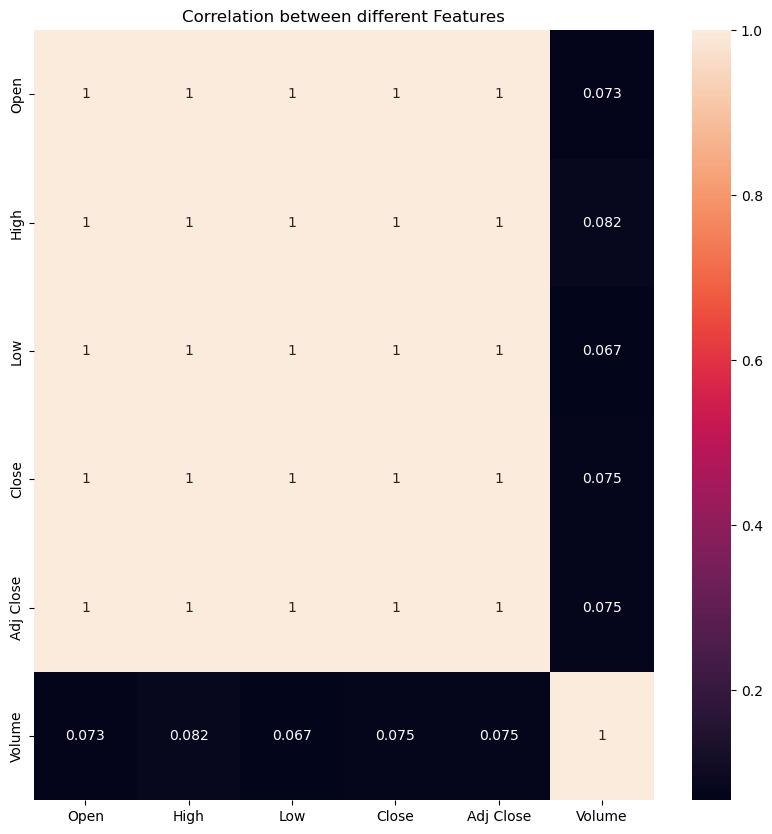

In [11]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)
plt.title('Correlation between different Features')

From above heatmap we can conclude that features like Open price, High price, Low price, Close price, VWAP has high correlation.

## Outlier Detection

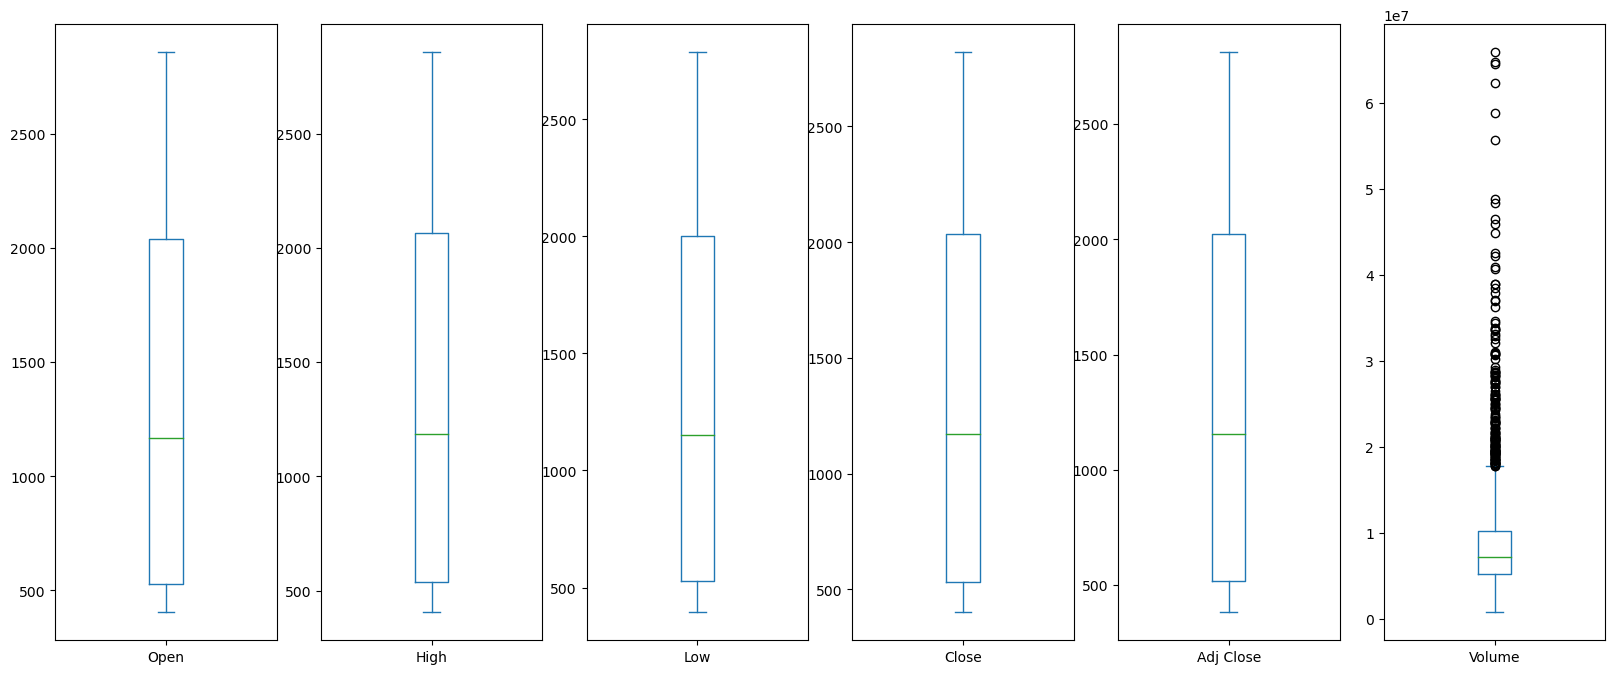

In [12]:
#Box plot
data.plot(kind='box',subplots=True,figsize=(20,8),sharex=False,sharey=False)
plt.show()

Outliers are detected in features like no.of shares, no.of trades, total turnover.

## EDA

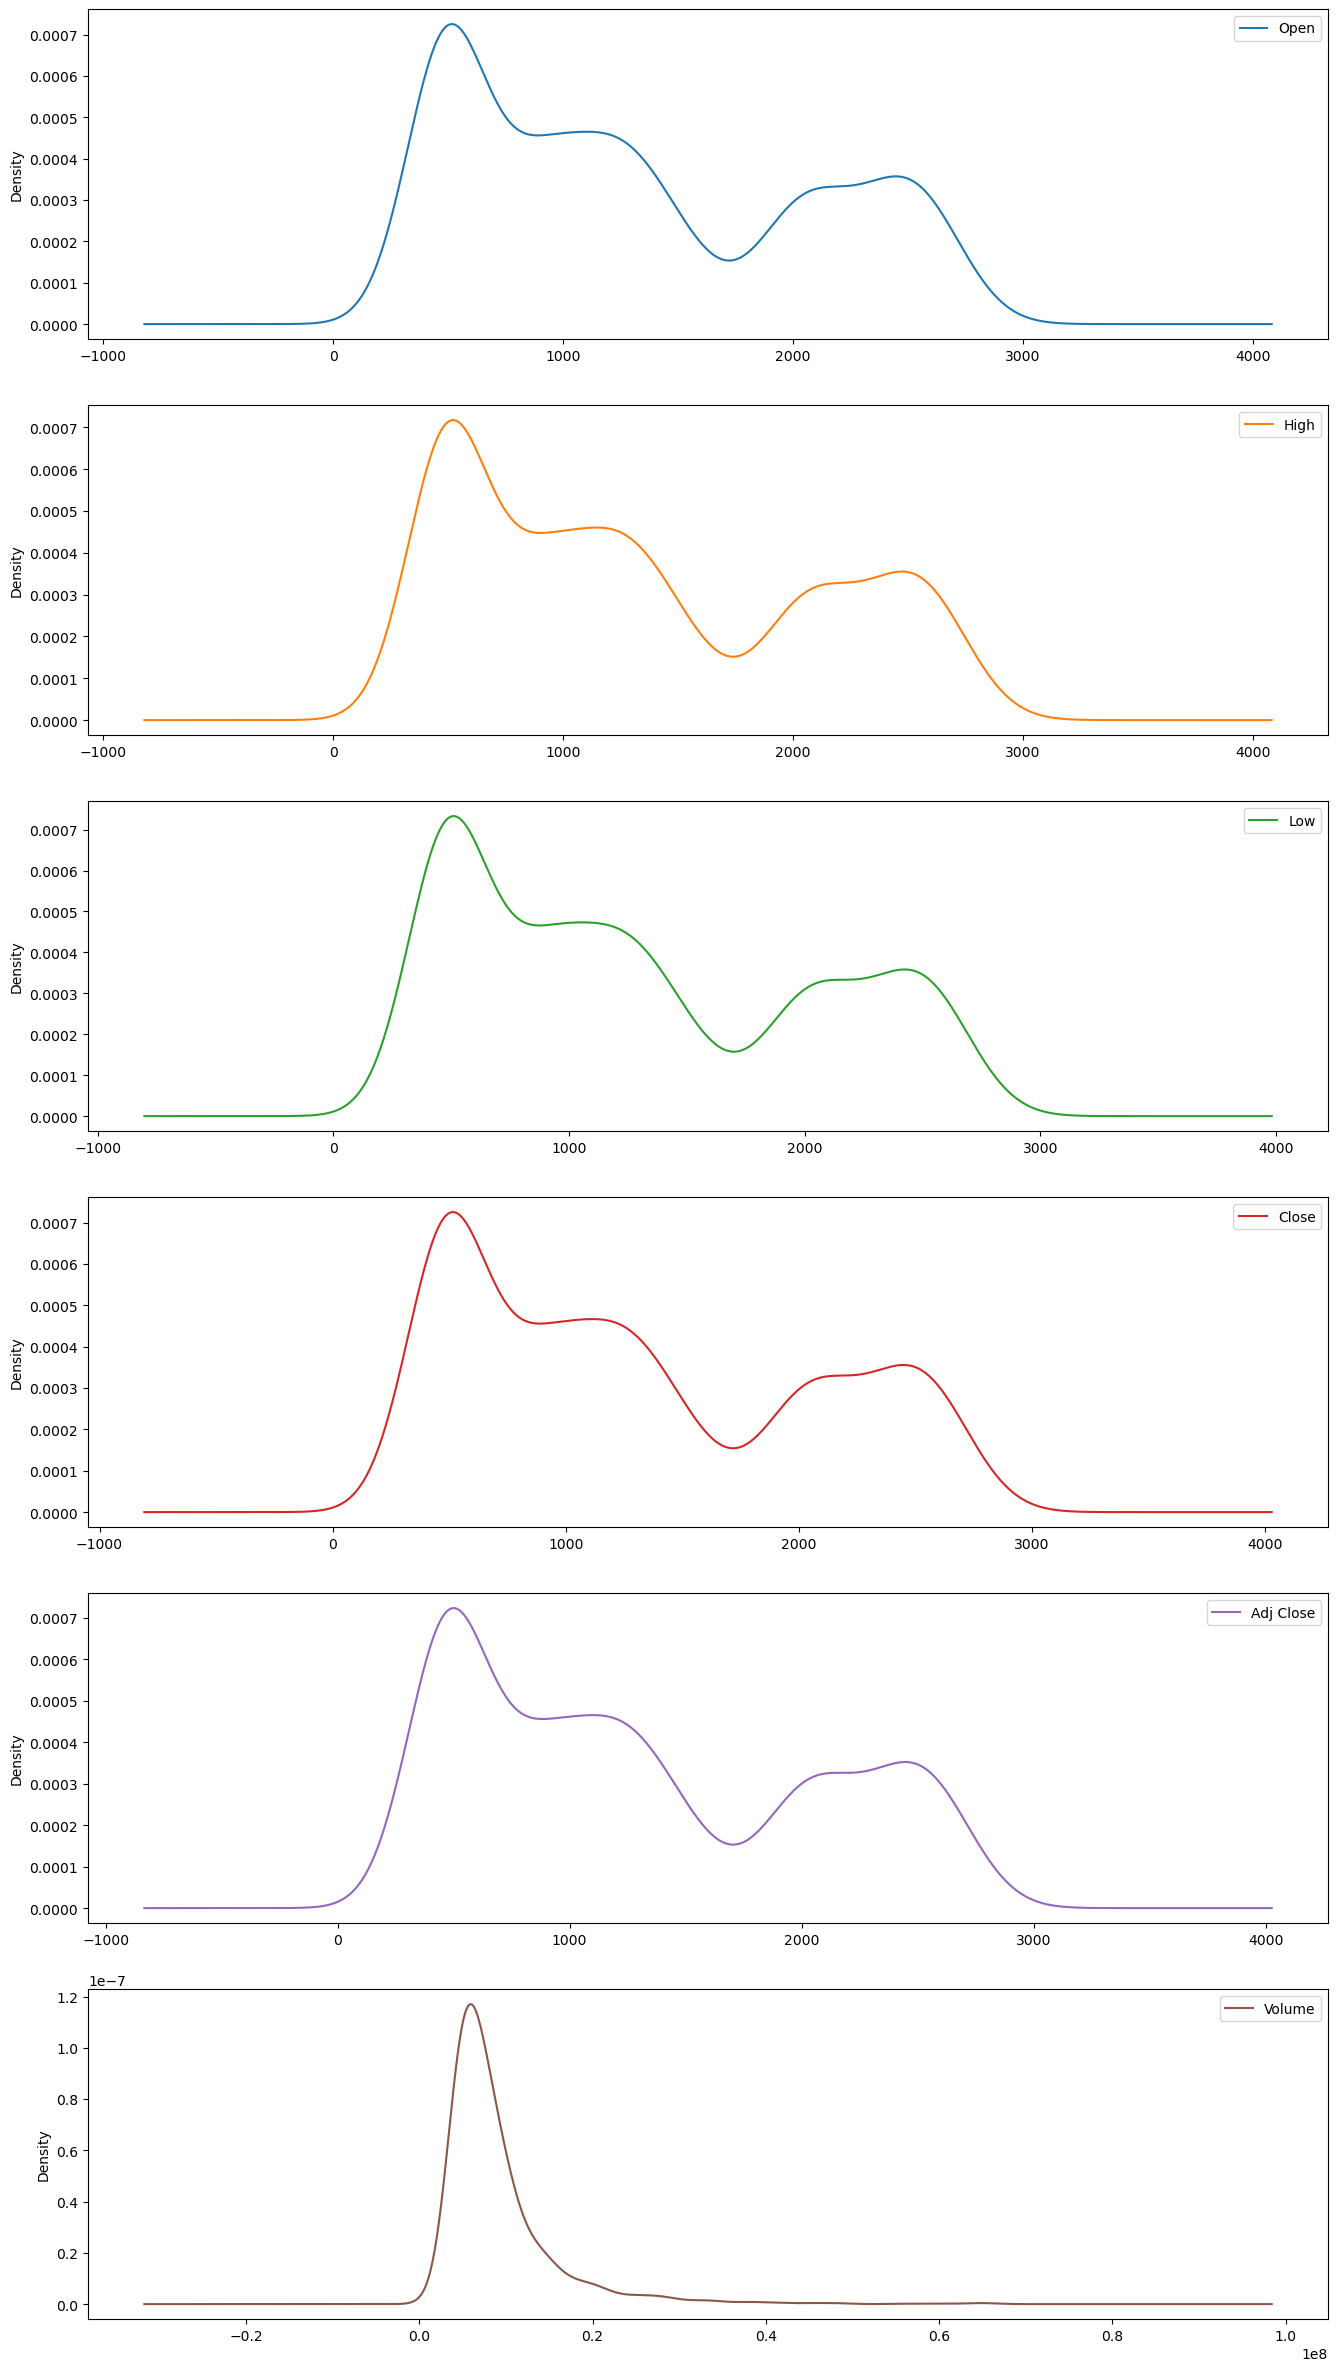

In [13]:
#Density plot
data.plot(kind='density',subplots=True,figsize=(16,30),sharex=False)
plt.show()

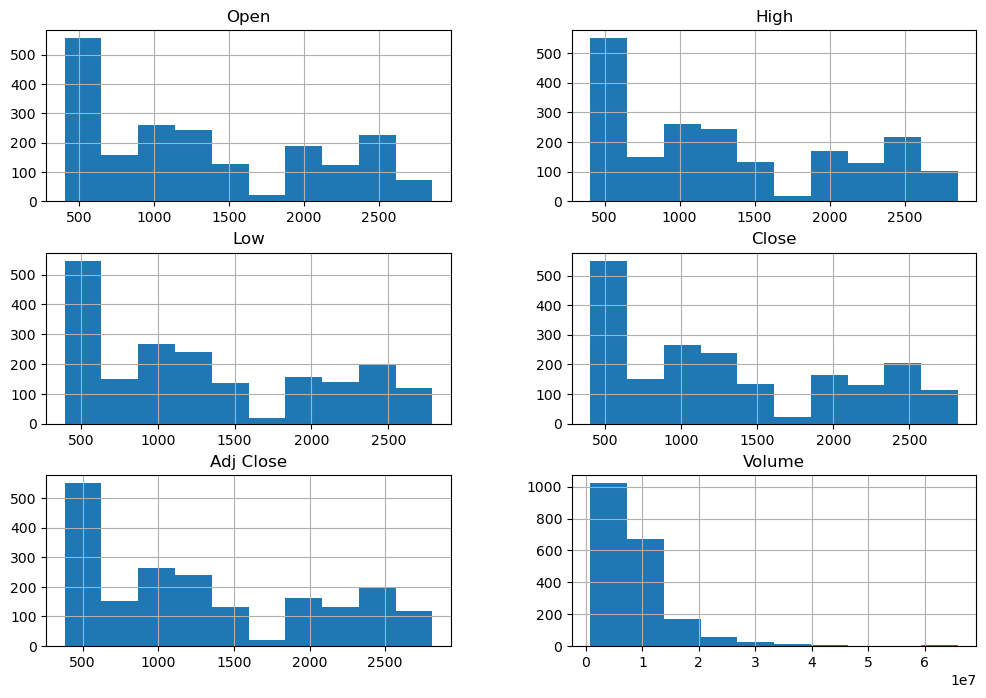

In [14]:
#Histogram
data.hist(figsize=(12,8))
plt.show()

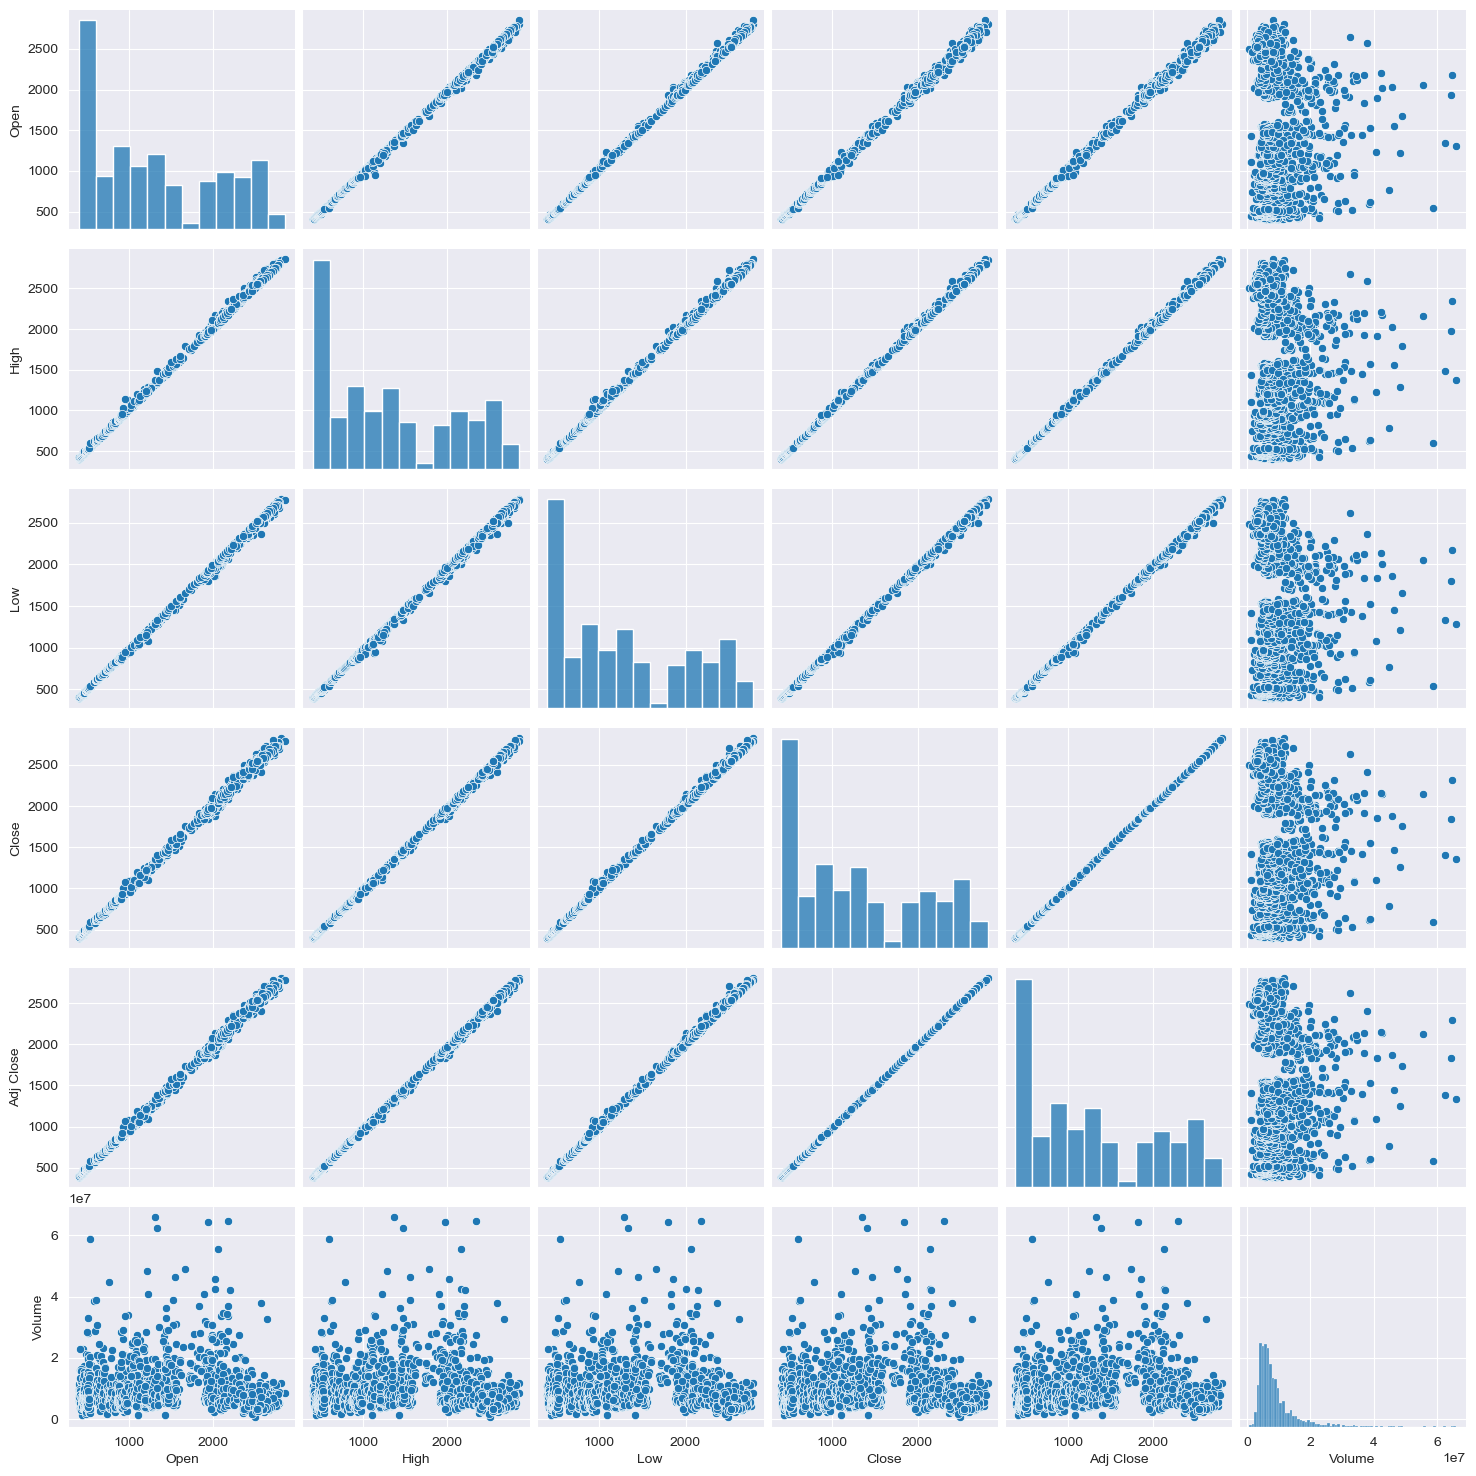

In [15]:
sns.set_style(style='darkgrid')
sns.pairplot(data)
plt.show()

In [16]:
num_columns=data.select_dtypes(exclude='object').columns.tolist()

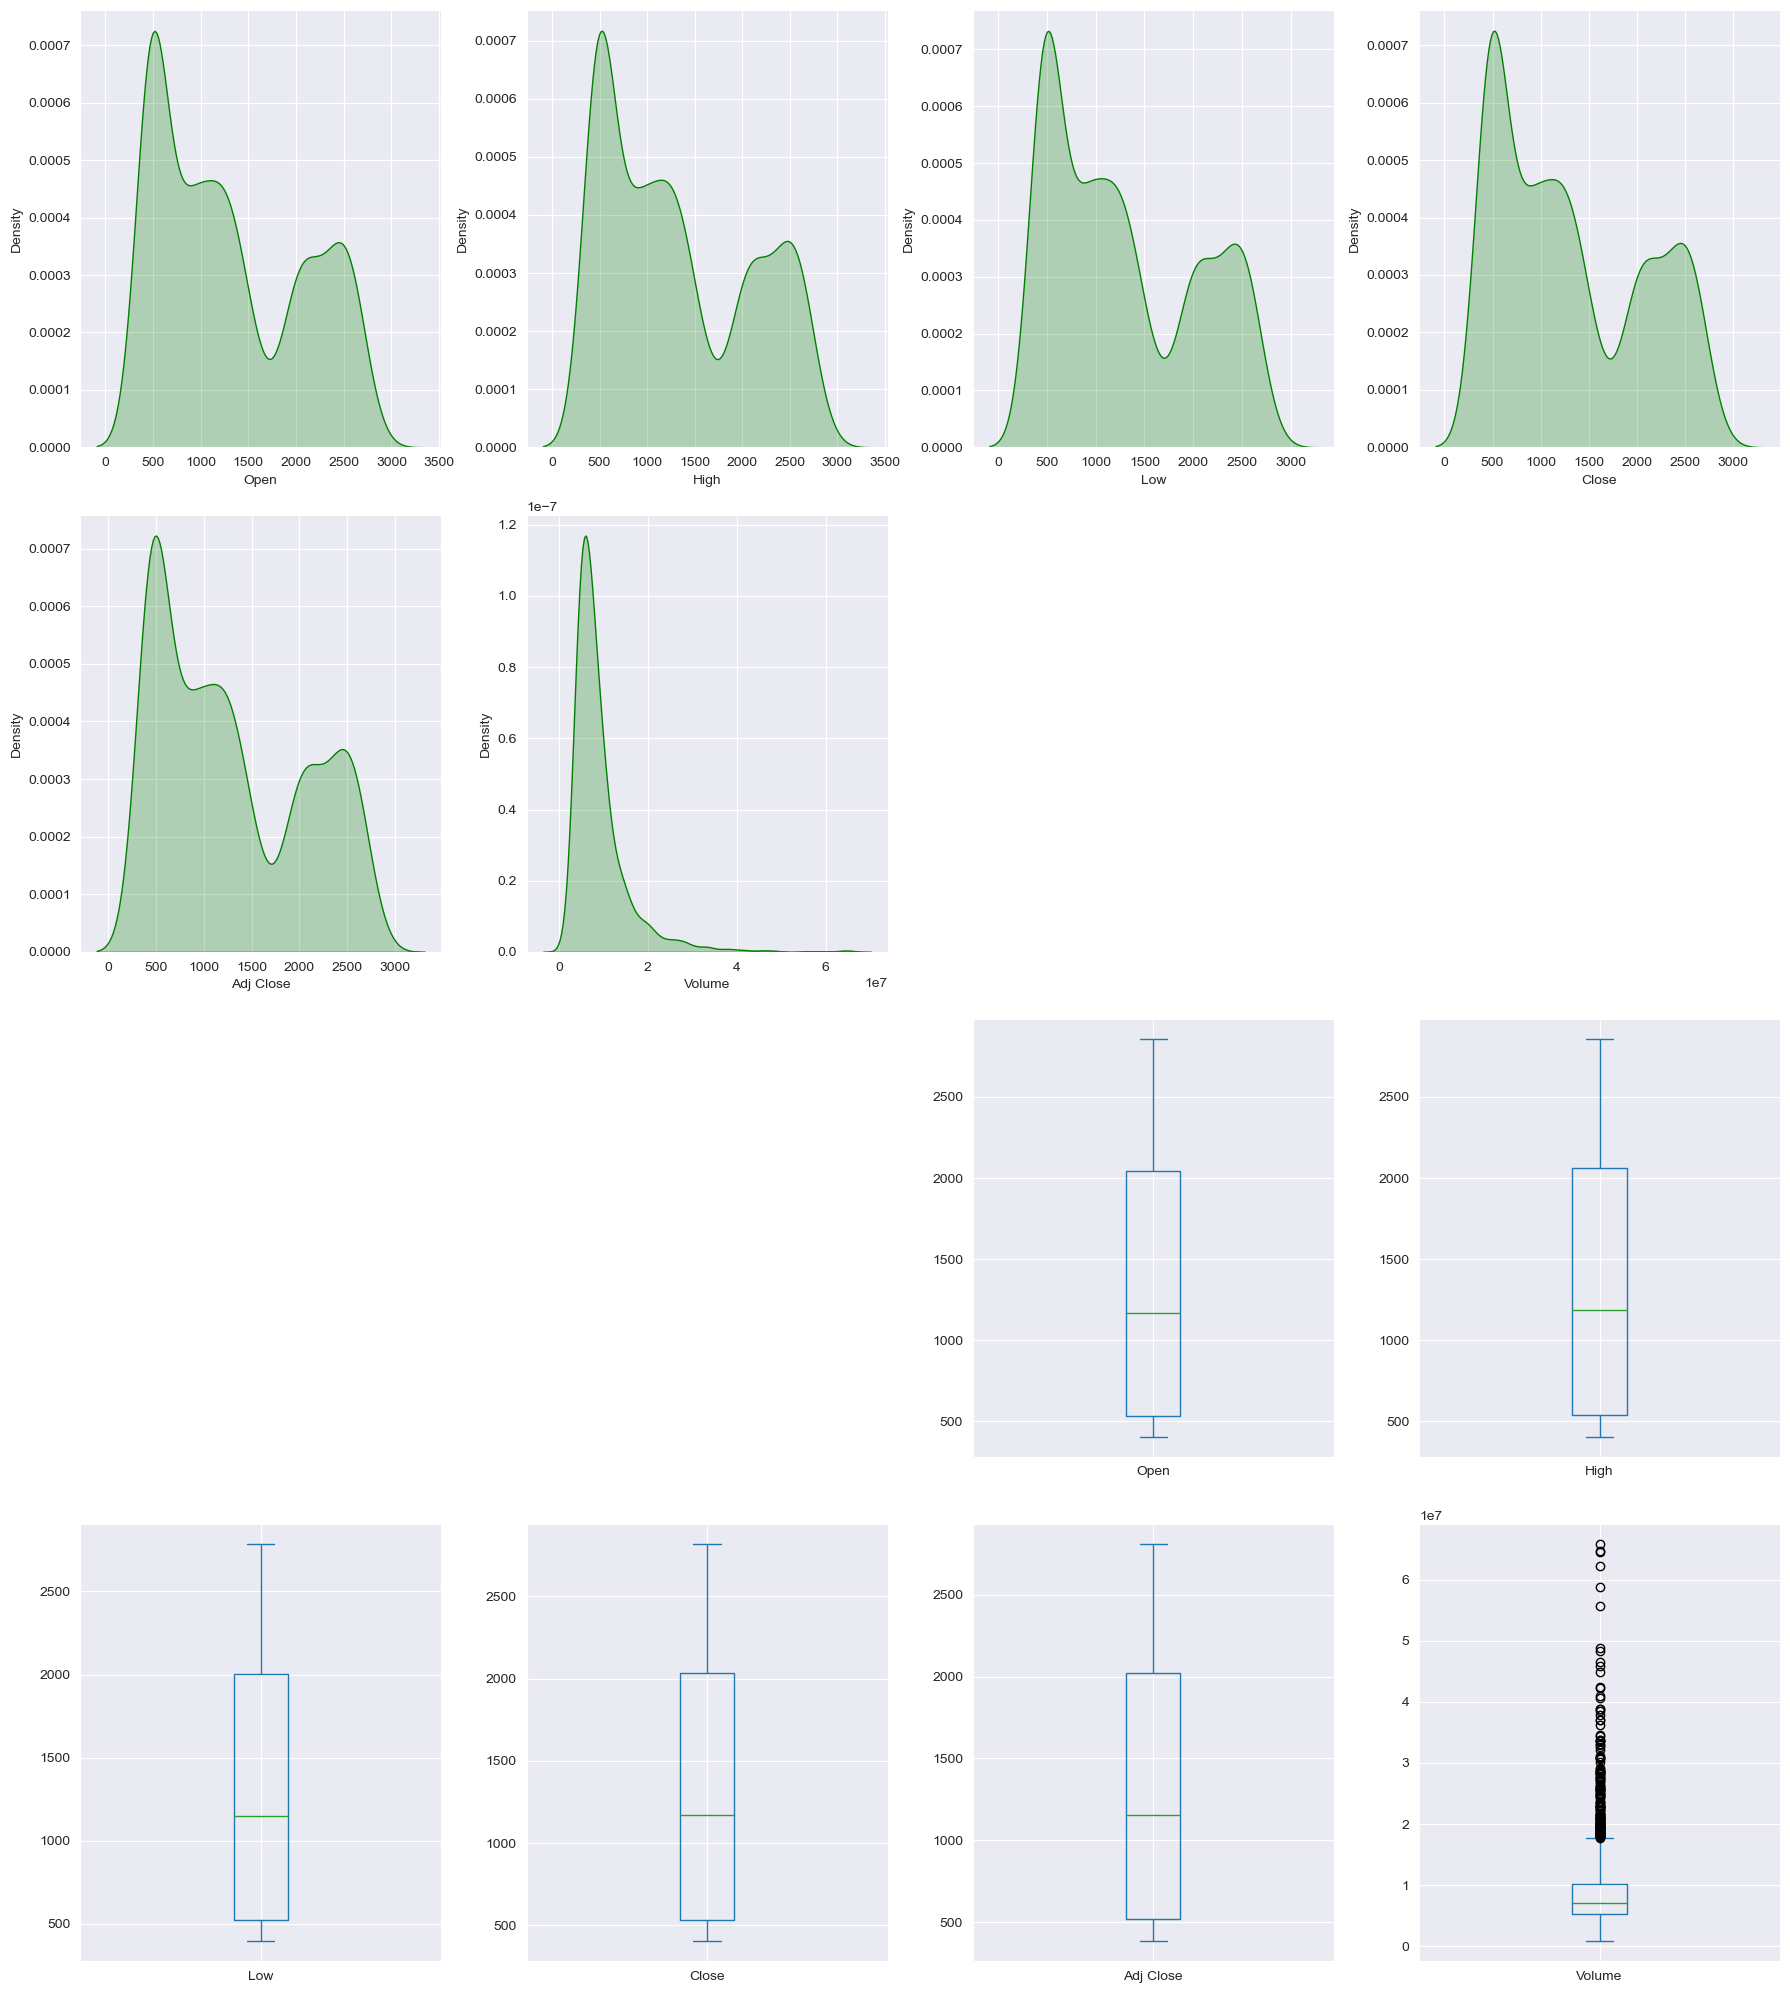

Open      High       Low     Close  Adj Close     Volume
skewness  0.439303  0.437199  0.443376  0.440620   0.445818   3.327632
kurtosis -1.222506 -1.223962 -1.216762 -1.219131  -1.215208  16.815287

In [18]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

## Auto EDA

## Sweetviz and Pandas profiling

In [19]:
#!pip install sweetviz
#!pip install pandas_profiling
#!pip install markupsafe

In [21]:
import sweetviz as sv
sweet_report=sv.analyze(data)
sweet_report.show_html('stock_report.html')

                                             |                                             | [  0%]   00:00 ->…

Report stock_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [22]:
import pandas_profiling as pan_prof
stock_report=pan_prof.ProfileReport(data)
stock_report.to_file(output_file='report.html')
stock_report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Model Building

In [12]:
#Linear Regression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# Split dataset into training and testing sets
X = data.drop([ 'Close'], axis=1)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# make predictions on the testing set
y_pred = model.predict(X_test)

# calculate the mean squared error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)


MAE: 2.595261599296336
MSE: 10.618645400001508
R2 Score: 0.999981758375367


In [29]:
#ARIMA
from subprocess import check_output
import warnings
from pandas.plotting import lag_plot
import datetime
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

def smape_kun(y_true, y_pred):
    return np.mean((np.abs(y_pred - y_true) * 200/ (np.abs(y_pred) + np.abs(y_true)))) 

train_data, test_data = data[0:int(len(data)*0.8)], data[int(len(data)*0.8):]
train_ar = train_data['Close'].values
test_ar = test_data['Close'].values
history = [x for x in train_ar]
print(type(history))
predictions = list()
for t in range(len(test_ar)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test_ar[t]
    history.append(obs)
    #print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test_ar, predictions)
print('Testing Mean Squared Error: %.3f' % error)
error2 = smape_kun(test_ar, predictions)
print('Symmetric mean absolute percentage error: %.3f' % error2)

<class 'list'>
Testing Mean Squared Error: 1581.967
Symmetric mean absolute percentage error: 1.212


In [30]:
#SVM
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

# Split dataset into training and testing sets
X = data.drop(['Close'], axis=1)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
svm = SVR(kernel='rbf', gamma='scale')
svm.fit(X_train, y_train)

# Predict on test set
y_pred = svm.predict(X_test)

# Calculate MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 657.7346810163846
MSE: 614872.5621428328
R2 Score: -0.05628110302785028


In [31]:
#random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Split dataset into training and testing sets
X = data.drop(['Close'], axis=1)
y = data['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on test set
y_pred = rf.predict(X_test)

# Calculate MSE
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("MSE:", mse)
print("R2 Score:", r2)

MAE: 2.367220281287086
MSE: 12.092628583578021
R2 Score: 0.9999792262399638


In [33]:
#!pip install keras

  Using cached keras-2.11.0-py2.py3-none-any.whl (1.7 MB)


In [39]:
#!pip install tensorflow

  Using cached tensorflow-2.11.0-cp39-cp39-win_amd64.whl (1.9 kB)
  Using cached tensorflow_intel-2.11.0-cp39-cp39-win_amd64.whl (266.3 MB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cached tensorboard-2.11.2-py3-none-any.whl (6.0 MB)
  Using cached grpcio-1.51.3-cp39-cp39-win_amd64.whl (3.7 MB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached absl_py-1.4.0-py3-none-any.whl (126 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached google_auth_oauthlib-0.4.6-py2.py3-none-any.whl (18 kB)
  Using cached google_auth-2.16.2-py2.py3-none-any.whl (177 kB)
  Using cached requests_oauthlib-1.3.1-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.2.2-py3-none-any.whl (151 kB)


In [40]:
#LSTM
import pandas as pd
import numpy as np
import seaborn as sns
import yfinance as yf
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import preprocessing
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

data=yf.download('Reliance.NS',start='2015-01-01',end='2022-12-30')
data

# Load and preprocess the data
data = data['Close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Split data into training and testing sets
train_size = int(len(data) * 0.8)
test_size = len(data) - train_size
train_data, test_data = data[0:train_size,:], data[train_size:len(data),:]

# Define function to create time series dataset
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back):
        X.append(dataset[i:(i+look_back), 0])
        Y.append(dataset[i+look_back, 0])
    return np.array(X), np.array(Y)

# Create time series dataset
look_back = 10
train_X, train_Y = create_dataset(train_data, look_back)
test_X, test_Y = create_dataset(test_data, look_back)

# Reshape input data to be [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], train_X.shape[1], 1))
test_X = np.reshape(test_X, (test_X.shape[0], test_X.shape[1], 1))

# Build LSTM model
lstm_model = Sequential()
lstm_model.add(LSTM(50, input_shape=(look_back, 1)))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')

# Train model
lstm_model.fit(train_X, train_Y, epochs=100, batch_size=32)

# Make predictions
train_predict = lstm_model.predict(train_X)
test_predict = lstm_model.predict(test_X)

# Invert predictions
train_predict = scaler.inverse_transform(train_predict)
train_Y = scaler.inverse_transform([train_Y])
test_predict = scaler.inverse_transform(test_predict)
test_Y = scaler.inverse_transform([test_Y])

# Calculate root mean squared error
train_score = mean_squared_error(train_Y[0], train_predict[:,0], squared=False)
print('Train Score: %.2f RMSE' % (train_score))
test_score = mean_squared_error(test_Y[0], test_predict[:,0], squared=False)
print('Test Score: %.2f RMSE' % (test_score))

train_score = mean_squared_error(train_Y[0], train_predict[:,0], squared=True)
print('Train Score: %.2f MSE' % (train_score))
test_score = mean_squared_error(test_Y[0], test_predict[:,0], squared=True)
print('Test Score: %.2f MSE' % (test_score))

Epoch 1/100
50/50 [==============================] - 2s 6ms/step - loss: 0.0041
Epoch 2/100
50/50 [==============================] - 0s 6ms/step - loss: 2.8072e-04
Epoch 3/100
50/50 [==============================] - 0s 6ms/step - loss: 2.6751e-04
Epoch 4/100
50/50 [==============================] - 0s 6ms/step - loss: 2.5470e-04
Epoch 5/100
50/50 [==============================] - 0s 6ms/step - loss: 2.6719e-04
Epoch 6/100
50/50 [==============================] - 0s 8ms/step - loss: 2.6916e-04
Epoch 7/100
50/50 [==============================] - 0s 7ms/step - loss: 2.5109e-04
Epoch 8/100
50/50 [==============================] - 0s 7ms/step - loss: 2.4836e-04
Epoch 9/100
50/50 [==============================] - 0s 9ms/step - loss: 2.4199e-04
Epoch 10/100
50/50 [==============================] - 0s 9ms/step - loss: 2.3958e-04
Epoch 11/100
50/50 [==============================] - 0s 6ms/step - loss: 2.4094e-04
Epoch 12/100
50/50 [==============================] - 0s 6ms/step - loss: 2.39